# Linear Regression

In [1]:
# Importing the basic libraries used to simulate the model

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the boston dataset from python library

from sklearn.datasets import load_boston

boston_dataset = load_boston()

In [3]:
# Loading the datasets into pandas dataframe for further processing and model training and testing

dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

dataset['MEDV'] = boston_dataset.target

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### The Boston Dataset variables in order:

**CRIM :** per capita crime rate by town

**ZN :** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS :** proportion of non-retail business acres per town

**CHAS :** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX :** nitric oxides concentration (parts per 10 million)

**RM :** average number of rooms per dwelling

**AGE :** proportion of owner-occupied units built prior to 1940

**DIS :** weighted distances to five Boston employment centres

**RAD :** index of accessibility to radial highways

**TAX :** full-value property-tax rate per $\$$10,000

**PTRATIO :** pupil-teacher ratio by town

**B :** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT :** lower status of the population

**MEDV :** Median value of owner-occupied homes in $1000's

In [4]:
# The statistical data related to the dataset (such as mean, variance, min and max values)

dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


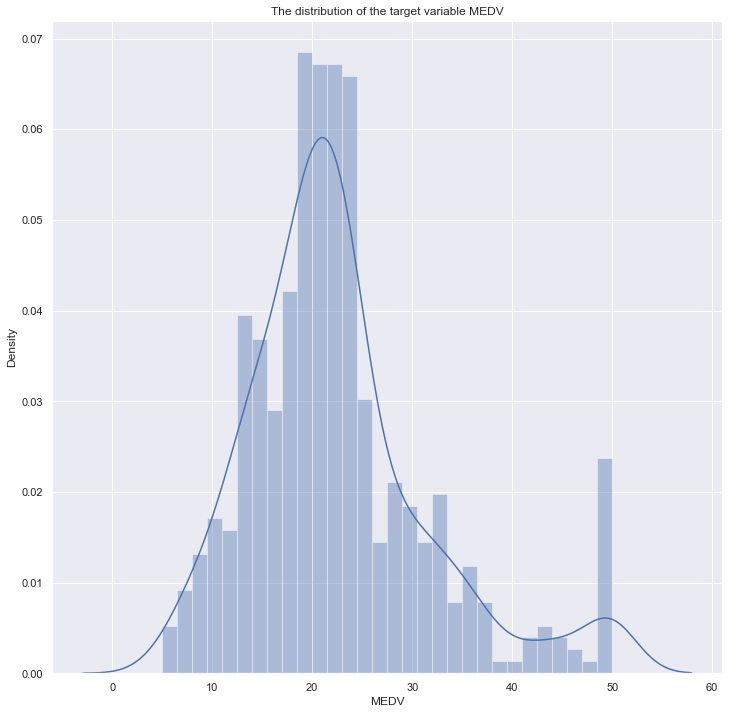

In [5]:
# The distribution of the target variable MEDV

sns.set(rc={'figure.figsize':(12, 12)})
sns.distplot(dataset['MEDV'], bins=30)
plt.title("The distribution of the target variable MEDV")
plt.show()

In [6]:
# Splitting the dataset into separate features dataframe and target dataframe for training and testing of the Machine Learing Model

X = pd.DataFrame(np.c_[dataset['CRIM'], dataset['ZN'], dataset['INDUS'], dataset['CHAS'], dataset['NOX'], dataset['RM'], dataset['AGE'], dataset['DIS'], dataset['RAD'], dataset['TAX'], dataset['PTRATIO'], dataset['B'], dataset['LSTAT']], columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
Y = dataset['MEDV']

In [7]:
# Scale the dataset

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

In [28]:
# Splitting the features and target into training and testing datasets.

from sklearn.model_selection import train_test_split

print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(506,)
(404, 13)
(102, 13)
(404,)
(102,)


## Hypothesis of a Linear Regression

A linear regression model is represented by:
$$
Y = w_0 + w_1x_1 + w_2x_2 + w_nx_n \quad \implies Y = w^Tx
$$
where, $Y$ is the predicted value, $w_0$ is the bias term, $w_1, ..., w_n$ are the weights, $x_1, x_2, ..., x_n$ are the feature values

The cost function is denoted by:
$$
J(w) = \frac{1}{2m}\sum_{i=1}^{m}(h(x_i)-y_i)^2
$$
where, $h(x) = w_0 + w_1x_1 + ... + w_nx_n$, and $m = $ number of training samples

Gradient Descent:
$$
\frac{\partial J(w)}{\partial w_0} = \frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)\\
\frac{\partial J(w)}{\partial w_j} = \frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)x_{i,j}
$$
where, $h(x) = w_0 + w_1x_1 + ... + w_nx_n$, and $m = $ number of training samples

Updating the parameters as
$$
w_0 = w_0 - \frac{\alpha}{m}\sum_{i=1}^{m}(h(x_i)-y_i)\\
w_j = w_j - \frac{\alpha}{m}\sum_{i=1}^{m}(h(x_i)-y_i)x_{i,j}
$$
where, $\alpha$ is the learning parameter and other parameters remain the same

In [9]:
# Calculating the cost

def CostFunction(x, y, weight, bias):
    cost = np.sum((((x.dot(weight) + bias) - y) ** 2) / (2*len(y)))
    return cost

In [25]:
# Gradient Descent

def GradientDescent(x, y, weight, bias, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        h = x.dot(weight) + bias
        loss = h - y
        print(loss.shape)
        
        bias_gradient = np.sum(loss) / len(y)
        weight_gradient = x.T.dot(loss) / len(y)
        
        bias = bias - learning_rate * bias_gradient
        weight = weight - learning_rate * weight_gradient
        
        cost = CostFunction(x, y, weight, bias)
        cost_list[epoch] = cost
        
        print("Cost at epoch",epoch,"is:",cost)
        
    return weight, bias, cost_list

In [27]:
# Calculating weights, bias and cost with weights and bias being zeros and the learning rate (alpha) = 0.01
print(X_train.shape[1])
weight, bias, cost = GradientDescent(X_train, Y_train, np.zeros(X_train.shape[1]), 0, 0.01, epochs=1500)

13
(404,)
Cost at epoch 0 is: 291.6584787203993
(404,)
Cost at epoch 1 is: 284.315400198861
(404,)
Cost at epoch 2 is: 277.32492714288685
(404,)
Cost at epoch 3 is: 270.65590556280574
(404,)
Cost at epoch 4 is: 264.2806312240359
(404,)
Cost at epoch 5 is: 258.1744489774137
(404,)
Cost at epoch 6 is: 252.3153990258961
(404,)
Cost at epoch 7 is: 246.6839046210285
(404,)
Cost at epoch 8 is: 241.26249632878944
(404,)
Cost at epoch 9 is: 236.0355685747836
(404,)
Cost at epoch 10 is: 230.98916468219386
(404,)
Cost at epoch 11 is: 226.1107870602551
(404,)
Cost at epoch 12 is: 221.38922959321422
(404,)
Cost at epoch 13 is: 216.81442962592155
(404,)
Cost at epoch 14 is: 212.3773372477478
(404,)
Cost at epoch 15 is: 208.06979984621438
(404,)
Cost at epoch 16 is: 203.88446013976883
(404,)
Cost at epoch 17 is: 199.81466610924218
(404,)
Cost at epoch 18 is: 195.85439143297864
(404,)
Cost at epoch 19 is: 191.99816519431187
(404,)
Cost at epoch 20 is: 188.24100977454168
(404,)
Cost at epoch 21 is: 18

Cost at epoch 205 is: 16.29704332954544
(404,)
Cost at epoch 206 is: 16.211088474111072
(404,)
Cost at epoch 207 is: 16.126800876134574
(404,)
Cost at epoch 208 is: 16.04414748359528
(404,)
Cost at epoch 209 is: 15.963095903723978
(404,)
Cost at epoch 210 is: 15.88361438980684
(404,)
Cost at epoch 211 is: 15.805671828254457
(404,)
Cost at epoch 212 is: 15.729237725930496
(404,)
Cost at epoch 213 is: 15.654282197734783
(404,)
Cost at epoch 214 is: 15.580775954435724
(404,)
Cost at epoch 215 is: 15.50869029074697
(404,)
Cost at epoch 216 is: 15.437997073643466
(404,)
Cost at epoch 217 is: 15.368668730912031
(404,)
Cost at epoch 218 is: 15.30067823993175
(404,)
Cost at epoch 219 is: 15.233999116679527
(404,)
Cost at epoch 220 is: 15.168605404956345
(404,)
Cost at epoch 221 is: 15.104471665829664
(404,)
Cost at epoch 222 is: 15.041572967287706
(404,)
Cost at epoch 223 is: 14.97988487410132
(404,)
Cost at epoch 224 is: 14.91938343788925
(404,)
Cost at epoch 225 is: 14.860045187382699
(404,)

(404,)
Cost at epoch 511 is: 11.631685040737292
(404,)
Cost at epoch 512 is: 11.630633318272816
(404,)
Cost at epoch 513 is: 11.629587953464558
(404,)
Cost at epoch 514 is: 11.628548863600546
(404,)
Cost at epoch 515 is: 11.627515967437617
(404,)
Cost at epoch 516 is: 11.626489185173163
(404,)
Cost at epoch 517 is: 11.625468438417435
(404,)
Cost at epoch 518 is: 11.62445365016637
(404,)
Cost at epoch 519 is: 11.623444744774984
(404,)
Cost at epoch 520 is: 11.622441647931266
(404,)
Cost at epoch 521 is: 11.621444286630593
(404,)
Cost at epoch 522 is: 11.620452589150629
(404,)
Cost at epoch 523 is: 11.619466485026754
(404,)
Cost at epoch 524 is: 11.618485905027935
(404,)
Cost at epoch 525 is: 11.617510781133092
(404,)
Cost at epoch 526 is: 11.616541046507933
(404,)
Cost at epoch 527 is: 11.61557663548222
(404,)
Cost at epoch 528 is: 11.6146174835275
(404,)
Cost at epoch 529 is: 11.613663527235266
(404,)
Cost at epoch 530 is: 11.612714704295554
(404,)
Cost at epoch 531 is: 11.611770953475

(404,)
Cost at epoch 746 is: 11.475200646307243
(404,)
Cost at epoch 747 is: 11.474754548794841
(404,)
Cost at epoch 748 is: 11.474309629755851
(404,)
Cost at epoch 749 is: 11.473865884689115
(404,)
Cost at epoch 750 is: 11.47342330912221
(404,)
Cost at epoch 751 is: 11.472981898611117
(404,)
Cost at epoch 752 is: 11.47254164873991
(404,)
Cost at epoch 753 is: 11.472102555120403
(404,)
Cost at epoch 754 is: 11.471664613391852
(404,)
Cost at epoch 755 is: 11.471227819220633
(404,)
Cost at epoch 756 is: 11.470792168299948
(404,)
Cost at epoch 757 is: 11.4703576563495
(404,)
Cost at epoch 758 is: 11.469924279115213
(404,)
Cost at epoch 759 is: 11.469492032368933
(404,)
Cost at epoch 760 is: 11.469060911908134
(404,)
Cost at epoch 761 is: 11.468630913555646
(404,)
Cost at epoch 762 is: 11.468202033159365
(404,)
Cost at epoch 763 is: 11.46777426659199
(404,)
Cost at epoch 764 is: 11.467347609750737
(404,)
Cost at epoch 765 is: 11.466922058557085
(404,)
Cost at epoch 766 is: 11.4664976089565

Cost at epoch 994 is: 11.392274973895265
(404,)
Cost at epoch 995 is: 11.392027120334074
(404,)
Cost at epoch 996 is: 11.391779798804745
(404,)
Cost at epoch 997 is: 11.391533007788308
(404,)
Cost at epoch 998 is: 11.391286745771144
(404,)
Cost at epoch 999 is: 11.391041011244944
(404,)
Cost at epoch 1000 is: 11.390795802706709
(404,)
Cost at epoch 1001 is: 11.390551118658706
(404,)
Cost at epoch 1002 is: 11.39030695760846
(404,)
Cost at epoch 1003 is: 11.390063318068723
(404,)
Cost at epoch 1004 is: 11.389820198557452
(404,)
Cost at epoch 1005 is: 11.389577597597803
(404,)
Cost at epoch 1006 is: 11.389335513718082
(404,)
Cost at epoch 1007 is: 11.389093945451748
(404,)
Cost at epoch 1008 is: 11.388852891337372
(404,)
Cost at epoch 1009 is: 11.388612349918635
(404,)
Cost at epoch 1010 is: 11.388372319744287
(404,)
Cost at epoch 1011 is: 11.388132799368137
(404,)
Cost at epoch 1012 is: 11.387893787349036
(404,)
Cost at epoch 1013 is: 11.387655282250842
(404,)
Cost at epoch 1014 is: 11.3

(404,)
Cost at epoch 1260 is: 11.341279147575715
(404,)
Cost at epoch 1261 is: 11.341132238283585
(404,)
Cost at epoch 1262 is: 11.340985593349044
(404,)
Cost at epoch 1263 is: 11.3408392121353
(404,)
Cost at epoch 1264 is: 11.340693094007499
(404,)
Cost at epoch 1265 is: 11.340547238332729
(404,)
Cost at epoch 1266 is: 11.34040164448
(404,)
Cost at epoch 1267 is: 11.340256311820248
(404,)
Cost at epoch 1268 is: 11.340111239726328
(404,)
Cost at epoch 1269 is: 11.339966427572993
(404,)
Cost at epoch 1270 is: 11.33982187473691
(404,)
Cost at epoch 1271 is: 11.339677580596625
(404,)
Cost at epoch 1272 is: 11.339533544532593
(404,)
Cost at epoch 1273 is: 11.33938976592713
(404,)
Cost at epoch 1274 is: 11.339246244164443
(404,)
Cost at epoch 1275 is: 11.339102978630594
(404,)
Cost at epoch 1276 is: 11.33895996871352
(404,)
Cost at epoch 1277 is: 11.338817213802999
(404,)
Cost at epoch 1278 is: 11.338674713290674
(404,)
Cost at epoch 1279 is: 11.338532466570015
(404,)
Cost at epoch 1280 is:

Text(0.5, 1.0, 'Training Cost')

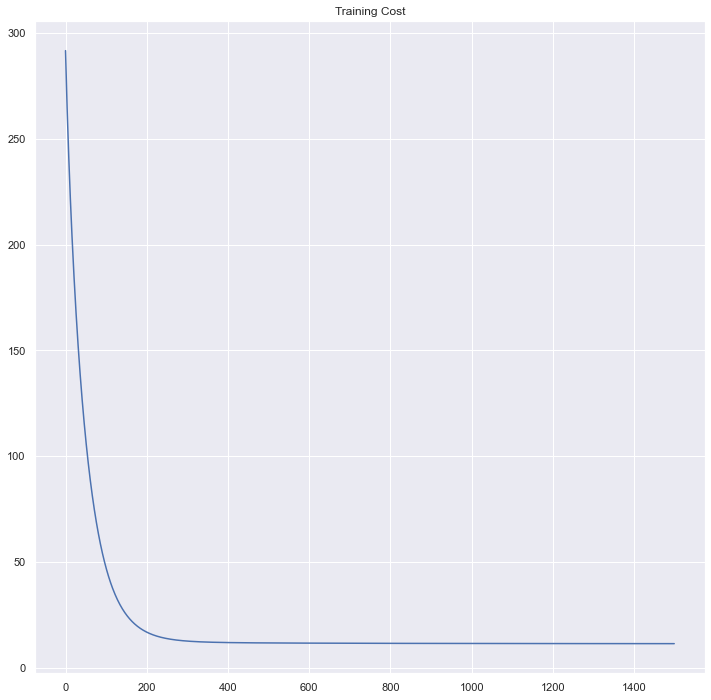

In [12]:
# Plotting the training loss at each epoch

epochs = [i for i in range(1500)]

plt.plot(epochs, cost)
plt.title("Training Cost")

In [13]:
# Predicting the values for the testing dataset

def predict(X, weight, bias):
    return X.dot(weight) + bias

In [14]:
y_pred = predict(X_test, weight, bias)

In [15]:
y_pred

array([37.39551251, 31.48136315, 27.32429926,  5.39446771, 35.07312219,
        5.79589562, 27.67225623, 31.76857373, 26.93559821, 22.51716813,
       32.3177069 , 21.24537097, 23.64345394, 32.78007266, 28.0814649 ,
       15.22544794, -0.17295222, 18.93841164, 14.06732225, 14.04994965,
        3.65344124, 20.07948738, 38.05860614, 24.25199817, 31.36720848,
       11.14233117, 25.00439892, 23.81873835, 22.37743876, 21.52048374,
       13.80774539,  8.55148669, 18.22349913, 22.48493311, 28.70345867,
       19.38398324, 30.15314207,  8.66723541, 40.90566098, 34.26069912,
       20.57186141,  2.84886071, 29.67559022, 12.0868959 , 26.75780304,
       30.96509242, -6.17938227, 18.47751387, 21.32459551, 12.80544079,
       20.8931313 , 19.23524405, 23.95894053, 12.88257675, 17.49062891,
       25.36669433, 35.28936299, 15.23205382, 27.94078276, 20.78880056,
       20.76595908, 25.87281078, 14.98515121, 33.13025648, 23.41749529,
       13.01294364, 19.48409639, 24.52464449, 21.4448282 , 21.74

In [16]:
Y_test.values

array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5])

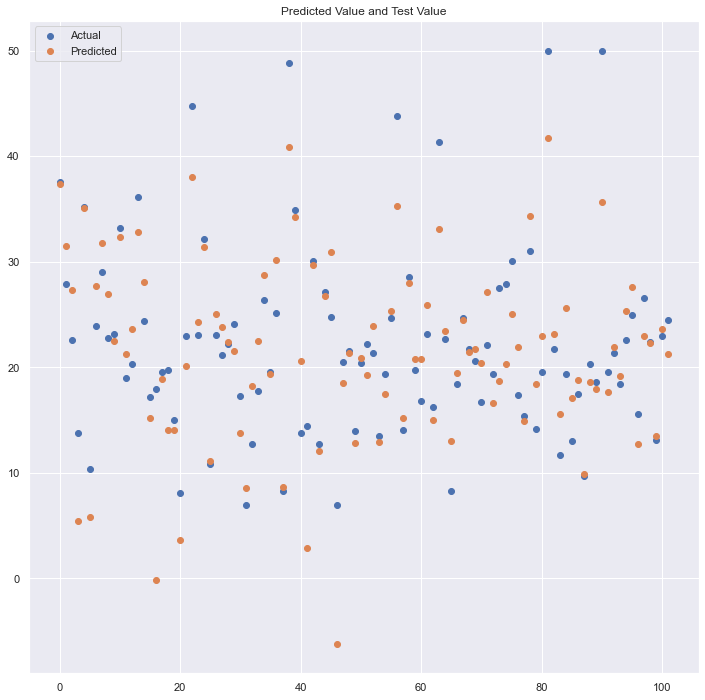

In [17]:
# Plotting the actual and predicted testing dataset values

y_range = [i for i in range(len(Y_test))]

plt.scatter(y_range, Y_test)
plt.scatter(y_range, y_pred)
plt.title("Predicted Value and Test Value")
plt.legend(labels = ('Actual','Predicted'), loc='upper left')

In [18]:
# Calculating the r² accuracy of our model

def r2score(y_pred, Y_test):
    rss = np.sum((y_pred - Y_test) ** 2)
    tss = np.sum((Y_test - Y_test.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

print(r2score(y_pred, Y_test))

0.7361941125156077


In [19]:
# Training the machine learing model using the in-built python library: scikit-learn

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

mlr.fit(X_train, Y_train)

y_predict = mlr.predict(X_test)

# Input code here:
print("Train score:")
print(mlr.score(X_train, Y_train))

print("Test score:")
print(mlr.score(X_test, Y_test))

Train score:
0.7383393920590519
Test score:
0.7334492147453073
